In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
#pythonda uyarıları kapatalım
import warnings
warnings.filterwarnings("ignore")

In [2]:
#veriyi içe aktaralım
veri = pd.read_csv("athlete_events.csv")
veri.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41318 entries, 0 to 41317
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      41318 non-null  int64  
 1   Name    41318 non-null  object 
 2   Sex     41318 non-null  object 
 3   Age     39816 non-null  float64
 4   Height  31987 non-null  object 
 5   Weight  31515 non-null  float64
 6   Team    41317 non-null  object 
 7   NOC     41317 non-null  object 
 8   Games   41317 non-null  object 
 9   Year    41317 non-null  float64
 10  Season  41317 non-null  object 
 11  City    41317 non-null  object 
 12  Sport   41317 non-null  object 
 13  Event   41317 non-null  object 
 14  Medal   5598 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 4.7+ MB


In [4]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
#drop fonksiyonu ile id ve games sütunlarını çıkaralım
veri=veri.drop(["ID","Games"], axis=1) #axis=1 sütun manasında
veri.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180,80.0,China,CHN,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170,60.0,China,CHN,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [6]:
veri.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180,80.0,China,CHN,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170,60.0,China,CHN,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
#NaN = NOT A NUMBER
essiz_etkinlik = pd.unique(veri.Event)
print("essiz etkinlik sayisi: {}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

essiz etkinlik sayisi: 718


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [8]:
veri_gecici=veri.copy() #bi kopya oluşturduk
boy_kilo_liste = ["Weight"]
for e in essiz_etkinlik:
    etkinlik_filtre = veri_gecici.Event == e
    veri_filtreli = veri_gecici[etkinlik_filtre]
    
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama) : 
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else:
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)
    veri_gecici[etkinlik_filtre] = veri_filtreli
veri= veri_gecici.copy()
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41318 entries, 0 to 41317
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    41318 non-null  object 
 1   Sex     41318 non-null  object 
 2   Age     39816 non-null  float64
 3   Height  31987 non-null  object 
 4   Weight  41317 non-null  float64
 5   Team    41317 non-null  object 
 6   NOC     41317 non-null  object 
 7   Year    41317 non-null  float64
 8   Season  41317 non-null  object 
 9   City    41317 non-null  object 
 10  Sport   41317 non-null  object 
 11  Event   41317 non-null  object 
 12  Medal   5598 non-null   object 
dtypes: float64(3), object(10)
memory usage: 4.1+ MB


In [9]:
yas_ortalamasi = np.round(np.mean(veri.Age),2)
print("Yas ortalamasi: {}".format(yas_ortalamasi))
veri["Age"] = veri["Age"].fillna(yas_ortalamasi)
veri.info()

Yas ortalamasi: 25.51
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41318 entries, 0 to 41317
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    41318 non-null  object 
 1   Sex     41318 non-null  object 
 2   Age     41318 non-null  float64
 3   Height  31987 non-null  object 
 4   Weight  41317 non-null  float64
 5   Team    41317 non-null  object 
 6   NOC     41317 non-null  object 
 7   Year    41317 non-null  float64
 8   Season  41317 non-null  object 
 9   City    41317 non-null  object 
 10  Sport   41317 non-null  object 
 11  Event   41317 non-null  object 
 12  Medal   5598 non-null   object 
dtypes: float64(3), object(10)
memory usage: 4.1+ MB


In [10]:
madalya_degiskeni = veri["Medal"]
pd.isnull(madalya_degiskeni).sum()


35720

In [11]:
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

In [12]:
veri = veri[madalya_degiskeni_filtresi]
veri.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,NaN,94.17,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,NaN,77.73,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,NaN,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184,85.00,Finland,FIN,2014.0,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175,64.00,Finland,FIN,1948.0,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [13]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5598 entries, 3 to 41301
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    5598 non-null   object 
 1   Sex     5598 non-null   object 
 2   Age     5598 non-null   float64
 3   Height  4271 non-null   object 
 4   Weight  5598 non-null   float64
 5   Team    5598 non-null   object 
 6   NOC     5598 non-null   object 
 7   Year    5598 non-null   float64
 8   Season  5598 non-null   object 
 9   City    5598 non-null   object 
 10  Sport   5598 non-null   object 
 11  Event   5598 non-null   object 
 12  Medal   5598 non-null   object 
dtypes: float64(3), object(10)
memory usage: 612.3+ KB


In [14]:
veri.to_csv("olimpiyatlar_temizlenmis.csv", index= False)

In [15]:
veri.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,NaN,94.17,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,NaN,77.73,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,NaN,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184,85.00,Finland,FIN,2014.0,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175,64.00,Finland,FIN,1948.0,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [16]:
def plotHistogram(degisken):
    plt.figure()
    plt.hist(veri[degisken], bins = 85, color = "orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

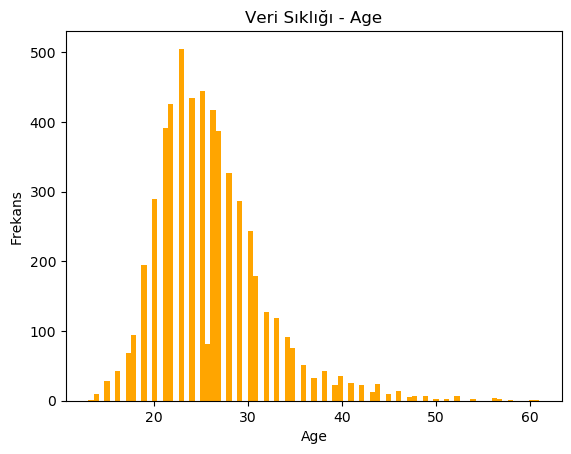

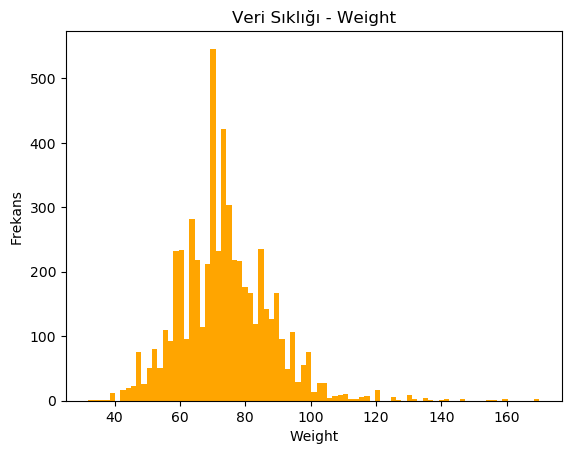

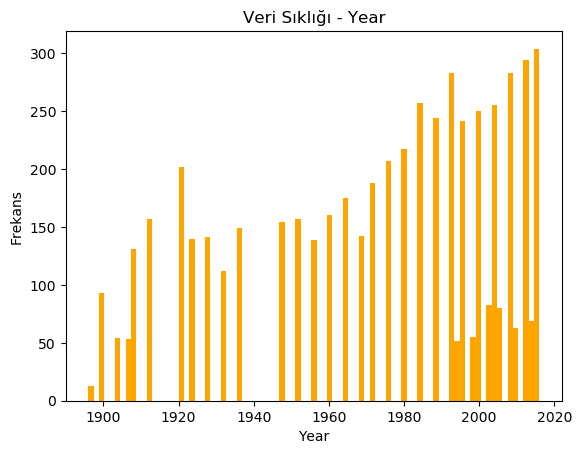

In [17]:
sayisal_degisken = ["Age", "Weight","Year"]
for i in sayisal_degisken:
    plotHistogram(i)

In [18]:
veri.describe()

,Age,Weight,Year
count,5598.000000,5598.000000,5598.000000
mean,25.996931,73.879913,1973.018578
std,5.742535,14.101340,34.250160
min,13.000000,32.000000,1896.000000
25%,22.000000,64.232500,1952.000000
50%,25.000000,72.790000,1984.000000
75%,29.000000,82.000000,2002.000000
max,61.000000,170.000000,2016.000000


In [19]:
veri.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,NaN,94.17,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,NaN,77.73,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,NaN,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184,85.00,Finland,FIN,2014.0,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175,64.00,Finland,FIN,1948.0,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


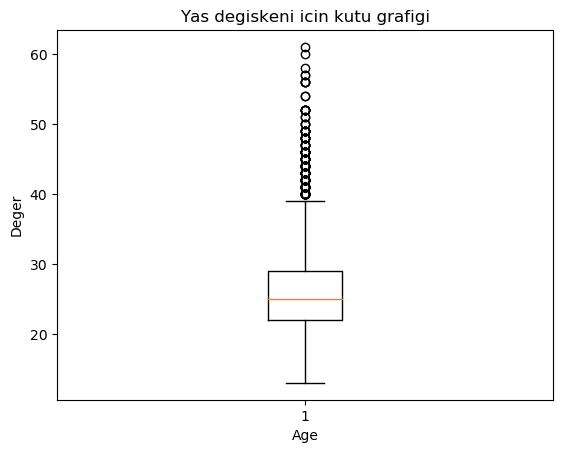

In [20]:
plt.boxplot(veri.Age)
plt.title("Yas degiskeni icin kutu grafigi")
plt.xlabel("Age")
plt.ylabel("Deger")
plt.show()

In [21]:
def plotBar(degisken, n=5):
    veri_=veri[degisken]
    veri_sayma=veri_.value_counts()
    veri_sayma=veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color="orange")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri sikligi - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, veri_sayma))

In [22]:
veri.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,NaN,94.17,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,NaN,77.73,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,NaN,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184,85.00,Finland,FIN,2014.0,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175,64.00,Finland,FIN,1948.0,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


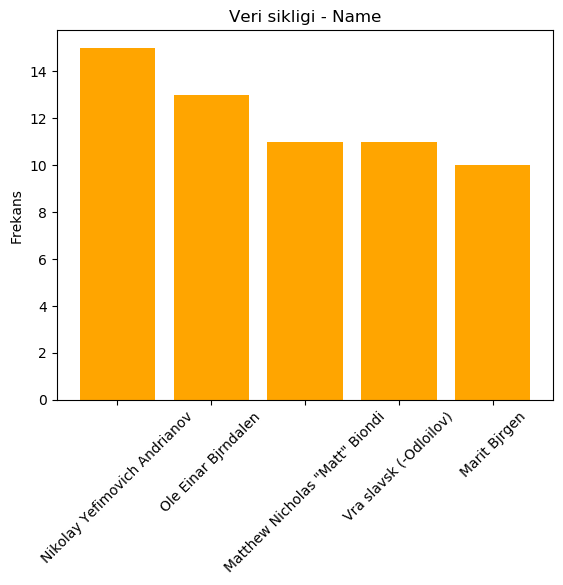

Name: 
 Nikolay Yefimovich Andrianov      15
Ole Einar Bjrndalen               13
Matthew Nicholas "Matt" Biondi    11
Vra slavsk (-Odloilov)            11
Marit Bjrgen                      10
Name: Name, dtype: int64


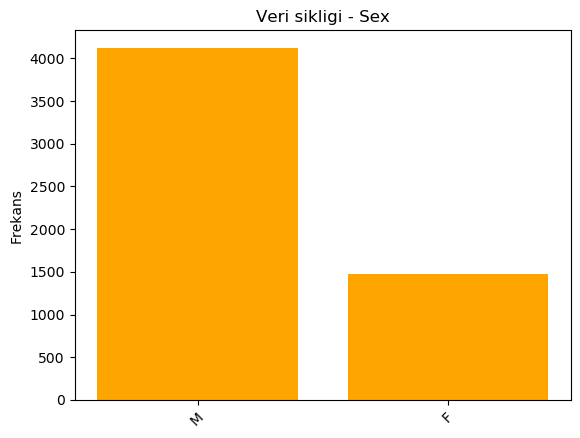

Sex: 
 M    4123
F    1475
Name: Sex, dtype: int64


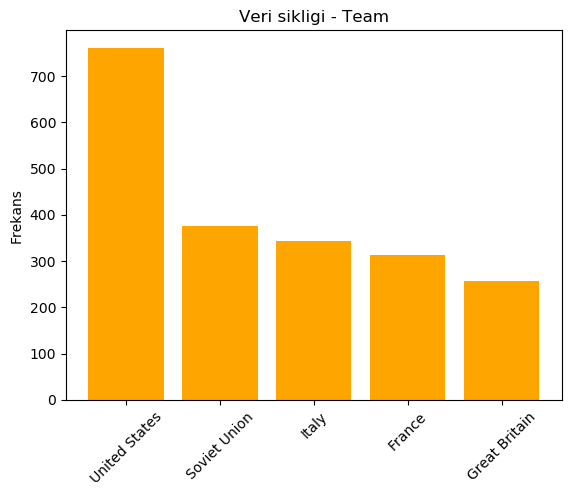

Team: 
 United States    761
Soviet Union     376
Italy            343
France           313
Great Britain    256
Name: Team, dtype: int64


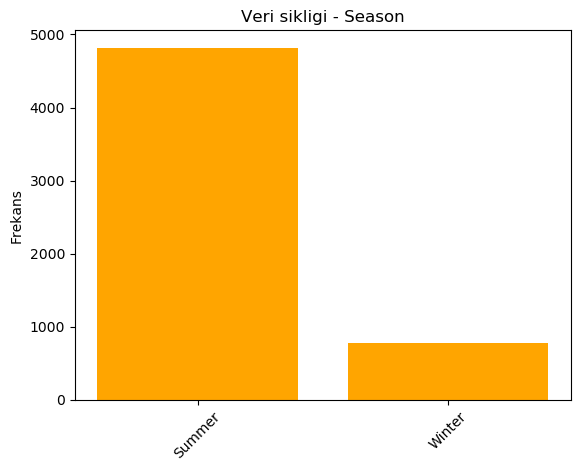

Season: 
 Summer    4817
Winter     781
Name: Season, dtype: int64


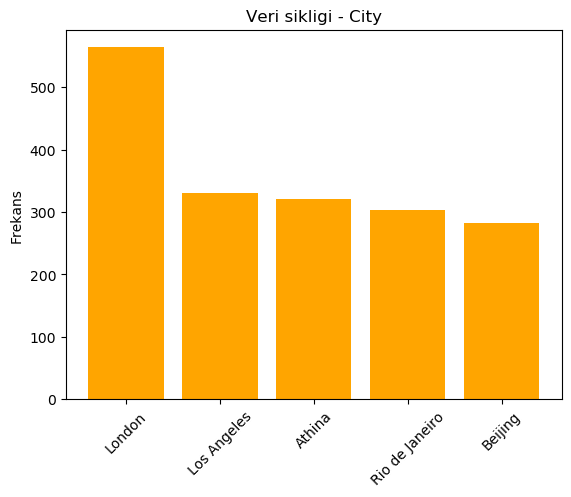

City: 
 London            564
Los Angeles       330
Athina            321
Rio de Janeiro    304
Beijing           283
Name: City, dtype: int64


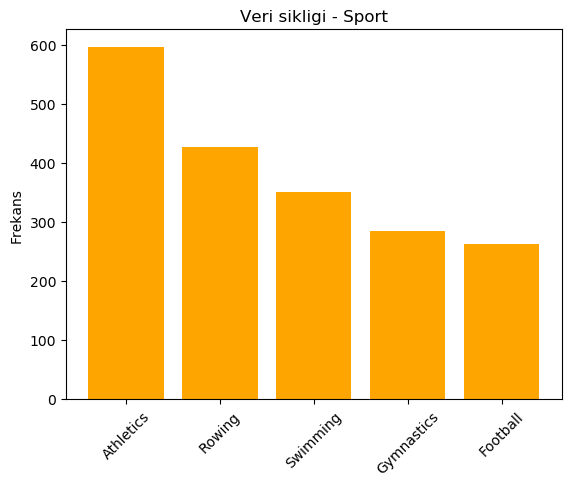

Sport: 
 Athletics     596
Rowing        427
Swimming      350
Gymnastics    285
Football      263
Name: Sport, dtype: int64


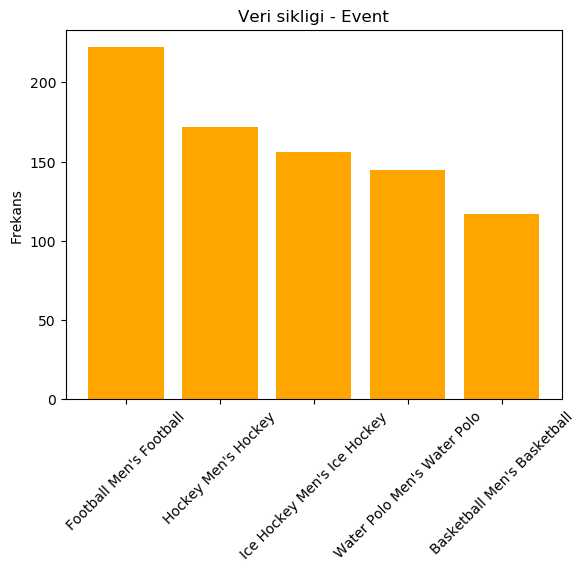

Event: 
 Football Men's Football        222
Hockey Men's Hockey            172
Ice Hockey Men's Ice Hockey    156
Water Polo Men's Water Polo    145
Basketball Men's Basketball    117
Name: Event, dtype: int64


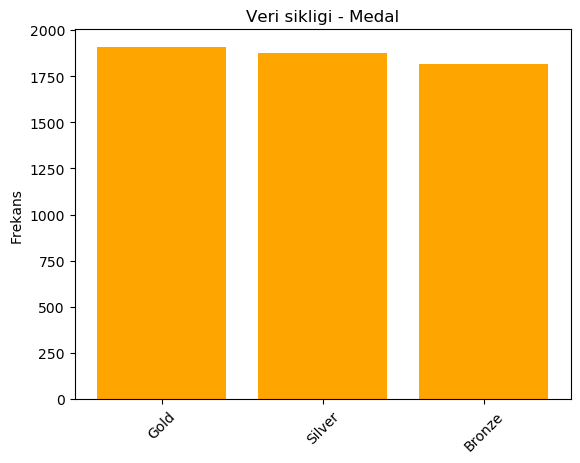

Medal: 
 Gold      1908
Silver    1876
Bronze    1814
Name: Medal, dtype: int64


In [23]:
kategorik_degisken = ["Name", "Sex", "Team", "Season", "City", "Sport", "Event", "Medal"]
for i in kategorik_degisken:
    plotBar(i,5)


In [24]:
erkek=veri[veri.Sex == "M"]
erkek.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,NaN,94.17,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,NaN,77.73,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,NaN,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [25]:
kadin=veri[veri.Sex == "F"]
kadin.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
79,Ragnhild Margrethe Aamodt,F,27.0,163,69.90,Norway,NOR,2008.0,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,NaN,60.35,Netherlands,NED,1988.0,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182,64.00,Norway,NOR,1996.0,Summer,Atlanta,Football,Football Women's Football,Bronze


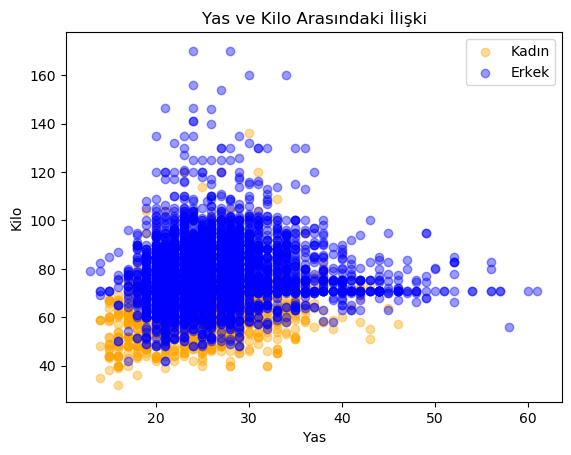

In [26]:
plt.figure()
plt.scatter(kadin.Age, kadin.Weight, alpha = 0.4, label="Kadın", color="orange" )
plt.scatter(erkek.Age, erkek.Weight, alpha = 0.4, label="Erkek", color="blue" )
plt.xlabel("Yas")
plt.ylabel("Kilo")
plt.title("Yas ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

In [27]:
veri.loc[:,["Age", "Weight"]].corr()

,Age,Weight
Age,1.000000,0.121307
Weight,0.121307,1.000000


In [28]:
#madalya yaş arası ilişki
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns=["Medal"])
veri_gecici.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
3,Edgar Lindenau Aabye,M,34.0,NaN,94.17,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,NaN,77.73,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [29]:
veri_gecici.loc[:,["Age", "Medal_Bronze", "Medal_Gold", "Medal_Silver"]].corr()

,Age,Medal_Bronze,Medal_Gold,Medal_Silver
Age,1.000000,-0.014366,-0.006366,0.020635
Medal_Bronze,-0.014366,1.000000,-0.497874,-0.491554
Medal_Gold,-0.006366,-0.497874,1.000000,-0.510510
Medal_Silver,0.020635,-0.491554,-0.510510,1.000000


In [30]:
veri_gecici[["Team","Medal_Bronze", "Medal_Gold", "Medal_Silver"]].groupby(["Team"], as_index= False).sum().sort_values(by="Medal_Gold", ascending=False)[:10]

,Team,Medal_Bronze,Medal_Gold,Medal_Silver
261,United States,163.0,382.0,216.0
222,Soviet Union,118.0,157.0,101.0
121,Italy,117.0,120.0,106.0
79,France,117.0,93.0,103.0
92,Great Britain,85.0,81.0,90.0
88,Germany,77.0,80.0,86.0
181,Norway,47.0,63.0,59.0
37,Canada,63.0,63.0,62.0
229,Sweden,92.0,60.0,88.0
202,Russia,58.0,54.0,41.0


In [31]:
veri_gecici[["City","Medal_Bronze", "Medal_Gold", "Medal_Silver"]].groupby(["City"], as_index= False).sum().sort_values(by="Medal_Gold", ascending=False)[:15]

,City,Medal_Bronze,Medal_Gold,Medal_Silver
17,London,182,194,188
18,Los Angeles,101,129,100
3,Athina,109,112,100
27,Rio de Janeiro,101,102,101
6,Beijing,102,89,92
38,Sydney,75,87,88
33,Seoul,58,79,86
5,Barcelona,82,78,82
4,Atlanta,79,76,87
26,Paris,65,68,78


In [32]:
veri_gecici[["Sex","Medal_Bronze", "Medal_Gold", "Medal_Silver"]].groupby(["Sex"], as_index= False).sum().sort_values(by="Medal_Gold", ascending=False)[:10]

,Sex,Medal_Bronze,Medal_Gold,Medal_Silver
1,M,1338.0,1385.0,1400.0
0,F,476.0,523.0,476.0


In [33]:
veri_pivot = veri.pivot_table(index="Medal", columns = "Sex", 
                             values=["Weight", "Age"],
                             aggfunc={"Weight":np.mean,"Age":[min, max, np.std]})
veri_pivot.head()

Age                                           Weight           
         max         min             std                 mean           
Sex        F     M     F     M         F         M          F          M
Medal                                                                   
Bronze  46.0  57.0  15.0  14.0  4.909992  5.728237  62.491849  77.486751
Gold    43.0  57.0  14.0  13.0  4.959530  6.043020  62.143461  78.088260
Silver  45.0  61.0  14.0  14.0  5.341901  5.909378  63.383277  78.094750

In [34]:
def anomaliTespiti(df, ozellik):
    outlier_indices = []
    
    for c in ozellik:
        #1.çeyrek
        Q1 = np.percentile(df[c],25)
        #3.çeyrek
        Q3 = np.percentile(df[c],75)
        #IQR = Inter Quartile Range
        IQR = Q3 - Q1
        #aykırı değer için ek adım miktari
        outlier_step = 1.5* IQR
        #aykırı değeri ve de bulumduğu indeksi tespit etme
        outlier_list_col = df[(df[c] < Q1 - outlier_step | df[c] > Q3 + outlier_step)].index
        #tespit edilen indeksleri depolama
        outlier_indices.extend(outlier_list_col)
    #essiz aykırı değerleri bulma
    outlier_indices = Counter(outlier_indices)
    #eğer bir örnek v adet sütunda farklı değerse bunu aykırı kabul edelim
    multiplie_outliers = list(i for i, v in outlier_indices.items() if v > 1 )
    
    return multiplie_outliers

In [35]:

#veri_anomali = veri.loc[anomaliTespiti(veri, ["Age", "Weight"])]
#veri_anomali.Sport.value_counts()


In [36]:
veri_zaman = veri.copy()
veri_zaman.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,NaN,94.17,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,NaN,77.73,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,NaN,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [37]:
essiz_yillar = veri_zaman.Year.unique()
essiz_yillar

array([1900., 1920., 2014., 1948., 1952., 1992., 1994., 2002., 2006.,
       2008., 1988., 1996., 1960., 1912., 1956., 2016., 2012., 2000.,
       2004., 1980., 1984., 1936., 1906., 1964., 1972., 1924., 1904.,
       1932., 1928., 1968., 1976., 2010., 1908., 1998., 1896.])

In [38]:
#yillari siralayim
dizili_array = np.sort(veri_zaman.Year.unique())
dizili_array

array([1896., 1900., 1904., 1906., 1908., 1912., 1920., 1924., 1928.,
       1932., 1936., 1948., 1952., 1956., 1960., 1964., 1968., 1972.,
       1976., 1980., 1984., 1988., 1992., 1994., 1996., 1998., 2000.,
       2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.])

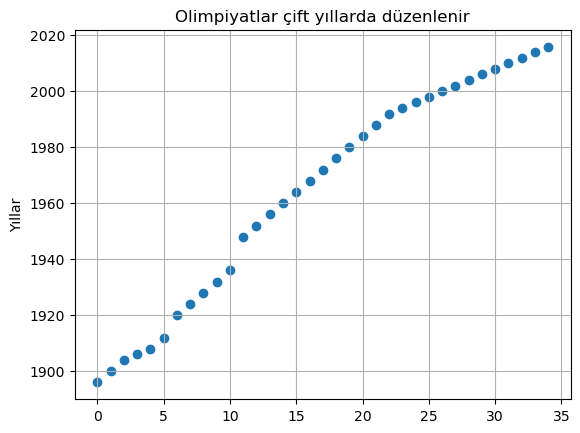

In [39]:
plt.figure()
plt.scatter(range(len(dizili_array)), dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar çift yıllarda düzenlenir")
plt.show()

In [40]:
#veri içerisinde bulunan yıl değerlerini datetime veri tipine dönüştürme
tarih_saat_nesnesi = pd.to_datetime(veri_zaman["Year"], format= '%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: Year, dtype: datetime64[ns]

In [41]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,NaN,94.17,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,NaN,77.73,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,NaN,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [42]:
#veri_zaman değişkenininana indeksini, datetime tipi olan tarih_saat değerine güncelleme
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["Year"], axis=1, inplace = True)
veri_zaman             

,Name,Sex,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,NaN,94.17,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,NaN,77.73,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,NaN,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
1972-01-01,Keith Raymond Christiansen,M,27.0,165,69.00,United States,USA,Winter,Sapporo,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
1920-01-01,Lauritz Christian Christiansen,M,52.0,NaN,70.79,Atlanta,NOR,Summer,Antwerpen,Sailing,Sailing Mixed 12 metres,Gold
2016-01-01,Mads Christiansen,M,30.0,197,93.00,Denmark,DEN,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold


In [43]:
periyodik_veri = veri_zaman.resample("2A").mean()
periyodik_veri.head()

,Age,Weight
tarih_saat,,
1896-12-31,23.733077,71.206154
1898-12-31,NaN,NaN
1900-12-31,25.899677,74.146774
1902-12-31,NaN,NaN
1904-12-31,25.084630,75.555741


In [44]:
#kayip verileri çıkarma
periyodik_veri.dropna(axis= 0 ,inplace = True)
periyodik_veri.head()

,Age,Weight
tarih_saat,,
1896-12-31,23.733077,71.206154
1900-12-31,25.899677,74.146774
1904-12-31,25.084630,75.555741
1906-12-31,24.813585,72.410189
1908-12-31,27.786565,73.060458


<Figure size 640x480 with 0 Axes>

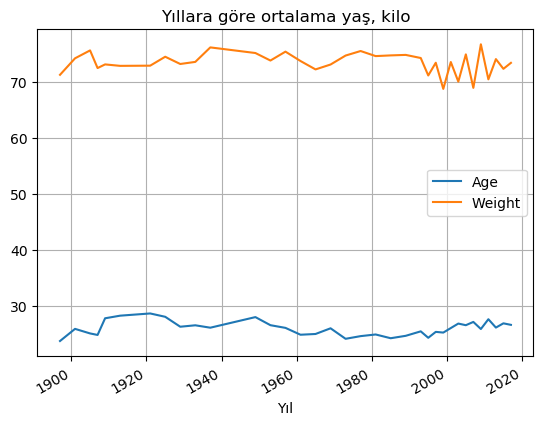

In [46]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara göre ortalama yaş, kilo")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

In [47]:
veri_zaman = pd.get_dummies(veri_zaman, columns=['Medal'])
veri_zaman.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,NaN,94.17,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,NaN,77.73,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,NaN,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [51]:
periyodik_veri = veri_zaman.resample("2A").sum()
periyodik_veri.head()

periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis=1)]
periyodik_veri.tail()

,Age,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
tarih_saat,,,,,
2008-12-31,7322.0,21691.53,102,89,92
2010-12-31,1740.0,4435.00,17,22,24
2012-12-31,7682.0,21757.65,95,98,101
2014-12-31,1855.0,4986.71,23,26,20
2016-12-31,8091.0,22294.58,101,102,101


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

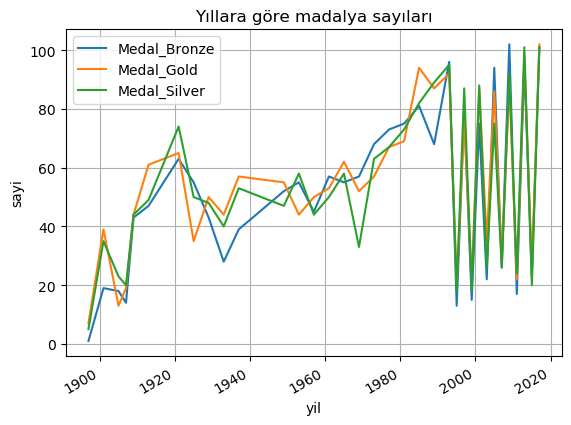

In [56]:
plt.figure()
periyodik_veri.loc[:,["Medal_Bronze", "Medal_Gold", "Medal_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları")
plt.ylabel("sayi")
plt.xlabel("yil")
plt.grid(True)
plt.show()

In [57]:
yaz = veri_zaman[veri_zaman.Season == "Summer"]
kis = veri_zaman[veri_zaman.Season == "Winter"]
kis.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [58]:
periyodik_veri_kis = kis.resample("A").sum()
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis == 0).any(axis=1)]
periyodik_veri_kis.head()

,Age,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
tarih_saat,,,,,
1924-12-31,635.51,1644.49,9,6,7
1928-12-31,369.00,1063.71,7,4,4
1932-12-31,301.00,803.78,1,2,9
1936-12-31,626.00,1763.21,5,11,7
1948-12-31,385.00,1178.18,8,3,4


In [59]:
periyodik_veri_yaz = yaz.resample("A").sum()
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz == 0).any(axis=1)]
periyodik_veri_yaz.head()

,Age,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
tarih_saat,,,,,
1896-12-31,308.53,925.68,1,7,5
1900-12-31,2408.67,6895.65,19,39,35
1904-12-31,1354.57,4080.01,18,13,23
1906-12-31,1315.12,3837.74,14,19,20
1908-12-31,3640.04,9570.92,43,44,44


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

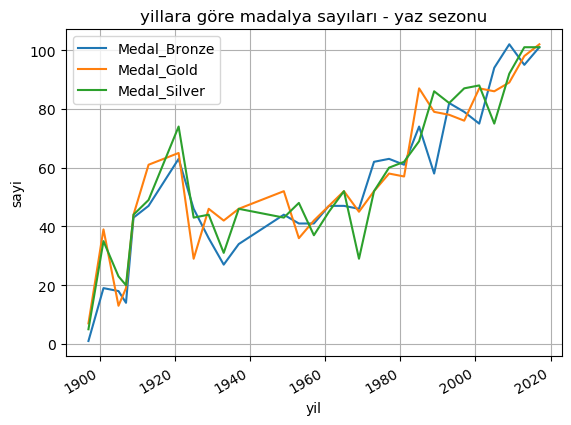

In [62]:
plt.figure()
periyodik_veri_yaz.loc[:,["Medal_Bronze", "Medal_Gold", "Medal_Silver"]].plot()
plt.title("yillara göre madalya sayıları - yaz sezonu")
plt.ylabel("sayi")
plt.xlabel("yil")
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

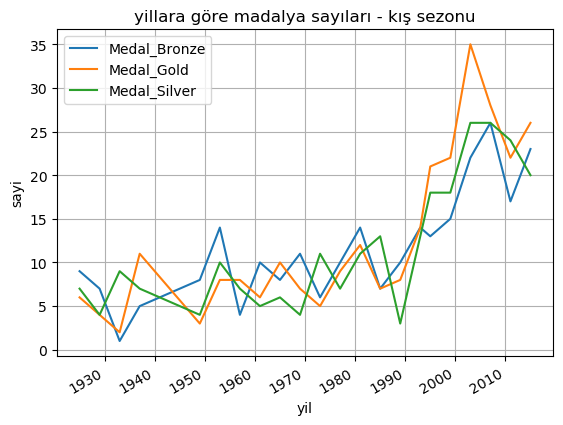

In [63]:
plt.figure()
periyodik_veri_kis.loc[:,["Medal_Bronze", "Medal_Gold", "Medal_Silver"]].plot()
plt.title("yillara göre madalya sayıları - kış sezonu")
plt.ylabel("sayi")
plt.xlabel("yil")
plt.grid(True)
plt.show()